# Example: Vectorial arithmetic using Embeddings
Dartmouth College, LING48/CS72, Spring 2024<br>
Samuel Peter (samuel.peter.25@dartmouth.edu)

This notebook uses a variant of Word2Vec called [FastText](https://fasttext.cc/docs/en/crawl-vectors.html), which learns both words and subword units. The script downloads a collection of embeddings (the .bin file) and then performs operations like analogies, similarity measurements, and "odd-one-out" operations.

The notebook also has code to generate a tSNE chart for a sequence of words.

You can learn more about the details of the code below here:<br>
https://samyzaf.com/ML/nlp/nlp.html

I got the visualization code from here:<br>
https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html

You can learn more about word2vec here:<br>
http://jalammar.github.io/illustrated-word2vec/

In [ ]:
#=========================================================
# Install fasttext model loaders
# https://fasttext.cc/
#=========================================================

!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4227140 sha256=a49392ba91d1d8b4d401da465aff0fe195aa98a8068e8d4a5ab7cdf99c694d25
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
#=========================================================
# Load libraries
#=========================================================

import fasttext
import fasttext.util
from sklearn.manifold import TSNE
import numpy as np

In [ ]:
#=========================================================
# There are 157 languages available. In this assignment,
# I will be using Sinhalese.
# https://fasttext.cc/docs/en/crawl-vectors.html
#
# Loading this might take 1~3 minutes.
#=========================================================

!curl -o es.bin.gz https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.es.300.bin.gz
!gzip -d es.bin.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4291M  100 4291M    0     0   145M      0  0:00:29  0:00:29 --:--:--  250M


In [ ]:
#=============================================================
# Load model into memory
#=============================================================

embeddings = fasttext.load_model('es.bin')
print(embeddings.get_dimension())

300


In [ ]:
#=============================================================
# Most similar word
#=============================================================

print("Top 25 words most similar to hombre(man): ")
embeddings.get_nearest_neighbors('hombre', k=25)        #man

Top 25 words most similar to hombre(man): 


[(0.6985235214233398, 'hombre.El'),
 (0.6847670078277588, 'mujer'),
 (0.6824022531509399, 'varón'),
 (0.6381804943084717, 'unhombre'),
 (0.6375911831855774, 'Hombre'),
 (0.6296564936637878, 'individuo'),
 (0.6243440508842468, 'humano'),
 (0.6197197437286377, 'elhombre'),
 (0.618654727935791, 'muchacho'),
 (0.6134461164474487, 'hombres'),
 (0.6023065447807312, 'hombre.Este'),
 (0.5991070866584778, 'no-hombre'),
 (0.5958799719810486, 'hombra'),
 (0.5950770974159241, 'hombre.Pero'),
 (0.5942564010620117, 'hombre.En'),
 (0.5892860293388367, 'hombre.Es'),
 (0.5885716676712036, 'niño-hombre'),
 (0.5856088399887085, 'hombre.La'),
 (0.584286093711853, 'hombre-'),
 (0.5841028690338135, 'mujer.El'),
 (0.58305823802948, 'hombre.Y'),
 (0.5821053981781006, 'chico'),
 (0.580610454082489, 'anciano'),
 (0.580307126045227, 'joven'),
 (0.5799315571784973, 'hombrees')]

In [ ]:
#=============================================================
# Most similar word
#=============================================================

print("Top 25 words most similar to mujer(woman): ")
embeddings.get_nearest_neighbors('mujer', k=25)   #woman

Top 25 words most similar to mujer(woman): 


[(0.7110328078269958, 'mujer.La'),
 (0.6897695064544678, 'mujermujer'),
 (0.6861298084259033, 'mujer.Pero'),
 (0.684766948223114, 'hombre'),
 (0.6845912933349609, 'muchacha'),
 (0.6795122623443604, 'fémina'),
 (0.6703848242759705, 'lamujer'),
 (0.6586087942123413, 'esposa'),
 (0.6574076414108276, 'chica'),
 (0.6479310989379883, 'niña'),
 (0.6458329558372498, 'dama'),
 (0.6451638340950012, 'unamujer'),
 (0.6437935829162598, 'mujera'),
 (0.6435273885726929, 'Mujer'),
 (0.6399717926979065, 'mujer-mujer'),
 (0.6391507983207703, 'mujer.Es'),
 (0.6384367346763611, 'mujer.Esta'),
 (0.6358761787414551, 'varón'),
 (0.634837806224823, 'hija'),
 (0.6306506991386414, 'mujerde'),
 (0.6281776428222656, 'mujer.El'),
 (0.6268007755279541, 'persona'),
 (0.6255276203155518, 'mujer.Una'),
 (0.6250082850456238, 'mujer.En'),
 (0.6209526062011719, 'hombruna')]

In [ ]:
#=============================================================
# Analogy
# rey(King) is to hombre(man) as mujer(woman) is to _____
#=============================================================

print("rey(King) is to hombre(man) as mujer(woman) is to _____")
embeddings.get_analogies("rey", "hombre", "mujer", k=25)

rey(King) is to hombre(man) as mujer(woman) is to _____


[(0.6996281743049622, 'reina'),
 (0.6584349870681763, 'princesa'),
 (0.578596293926239, 'reina-madre'),
 (0.5746439695358276, 'monarca'),
 (0.5572191476821899, 'emperatriz'),
 (0.5523837804794312, 'Rey'),
 (0.5444003939628601, 'reyes'),
 (0.5441058278083801, 'hija'),
 (0.5410926938056946, 'Reina'),
 (0.5355700254440308, 'consorte'),
 (0.5331939458847046, 'infanta'),
 (0.5261333584785461, 'reina-viuda'),
 (0.5260338187217712, 'esposa'),
 (0.5179920792579651, 'príncipe'),
 (0.5175434947013855, 'dama'),
 (0.517275333404541, 'infanta-reina'),
 (0.5155842304229736, 'emperadora'),
 (0.515200674533844, 'lareina'),
 (0.5045839548110962, 'laprincesa'),
 (0.504417359828949, 'virreina'),
 (0.5041970610618591, 'reyna'),
 (0.5037978887557983, 'realeza'),
 (0.502633273601532, 'monarquía'),
 (0.5008916258811951, 'reinona'),
 (0.4997826814651489, 'emperatríz')]

reina is the representation of queen in Spanish. From the output received, we can see that the word queen has been included in the results. We can also see that model was able to capture different variations of the word as well, like reyna and Reina.

In [ ]:
#=============================================================================
# tSNE plot. Based on code from:
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
#=============================================================================

def reduce_dimensions(model, words):

    # extract the words & their vectors, as numpy arrays
    wordVectors = []

    for w in words:
      wordVectors.append(embeddings.get_word_vector(w))

    vectors = np.asarray(wordVectors)
    labels = np.asarray(words)

    # reduce using t-SNE
    tsne = TSNE(n_components=2, random_state=1, perplexity=3)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    indices = list(range(len(labels)))
    for i in indices:
      plt.annotate(labels[i], (x_vals[i], y_vals[i]))
      #plt.annotate(labels[i], (x_vals[i], y_vals[i]), fontproperties=fprop)    # Uncomment this line for CJK fonts

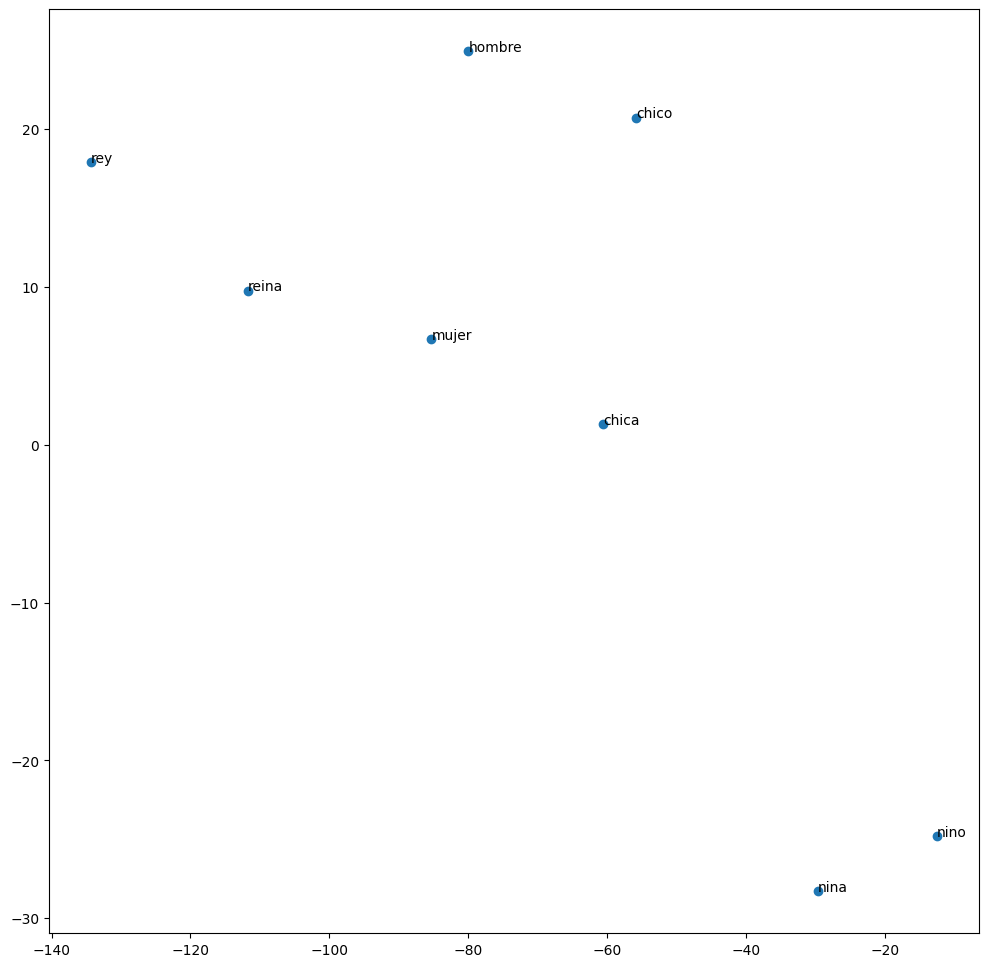

In [ ]:
#=============================================================================
# Draw tSNE chart for individual words
#=============================================================================

wordsInChart = ['hombre', 'mujer','rey','reina','nino', 'nina','chico','chica']
x_vals, y_vals, labels = reduce_dimensions(embeddings, wordsInChart)
plot_with_matplotlib(x_vals, y_vals, labels)